In [1]:
import pandas as pd
import numpy as np

from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [55]:
#Reading the CSV file
df = pd.read_csv("Datasets/cleaned_weatherAUS.csv")

In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2009-09-02,Albury,1.0,16.8,0.0,ESE,24.0,ESE,E,9.0,9.0,82.0,45.0,1024.9,1020.2,7.0,16.0,No,No,9
1,2009-09-03,Albury,6.1,20.7,0.0,NE,43.0,SE,NE,4.0,24.0,80.0,54.0,1016.6,1010.8,10.2,20.3,No,Yes,9
2,2009-09-04,Albury,6.3,16.9,1.4,NW,35.0,ESE,WNW,6.0,13.0,85.0,58.0,1014.4,1012.3,12.5,15.5,Yes,No,9
3,2009-09-05,Albury,2.1,15.0,0.0,WNW,30.0,ESE,NW,4.0,11.0,81.0,54.0,1019.5,1017.9,8.6,14.9,No,No,9
4,2009-09-06,Albury,1.6,16.6,0.0,NE,37.0,SE,NE,9.0,20.0,79.0,47.0,1018.4,1011.4,8.3,15.4,No,No,9


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109523 entries, 0 to 109522
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109523 non-null  object 
 1   Location       109523 non-null  object 
 2   MinTemp        109523 non-null  float64
 3   MaxTemp        109523 non-null  float64
 4   Rainfall       109523 non-null  float64
 5   WindGustDir    109523 non-null  object 
 6   WindGustSpeed  109523 non-null  float64
 7   WindDir9am     109523 non-null  object 
 8   WindDir3pm     109523 non-null  object 
 9   WindSpeed9am   109523 non-null  float64
 10  WindSpeed3pm   109523 non-null  float64
 11  Humidity9am    109523 non-null  float64
 12  Humidity3pm    109523 non-null  float64
 13  Pressure9am    109523 non-null  float64
 14  Pressure3pm    109523 non-null  float64
 15  Temp9am        109523 non-null  float64
 16  Temp3pm        109523 non-null  float64
 17  RainToday      109523 non-nul

In [58]:
df.isna().mean().round(4) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Month            0.0
dtype: float64

In [59]:
Direction = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
Degree = []

x = 0
for i in range(0,337,22):
    Degree.append(i+x)
    x = x + 0.5
    
Direction_Degree = dict(zip(Direction,Degree))
print(Direction_Degree)

#Converting WindGustDir, WindDir9am, WindDir3pm to degree format

df = df.replace({"WindGustDir": Direction_Degree})
df = df.replace({"WindDir9am": Direction_Degree})
df = df.replace({"WindDir3pm": Direction_Degree})

{'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5}


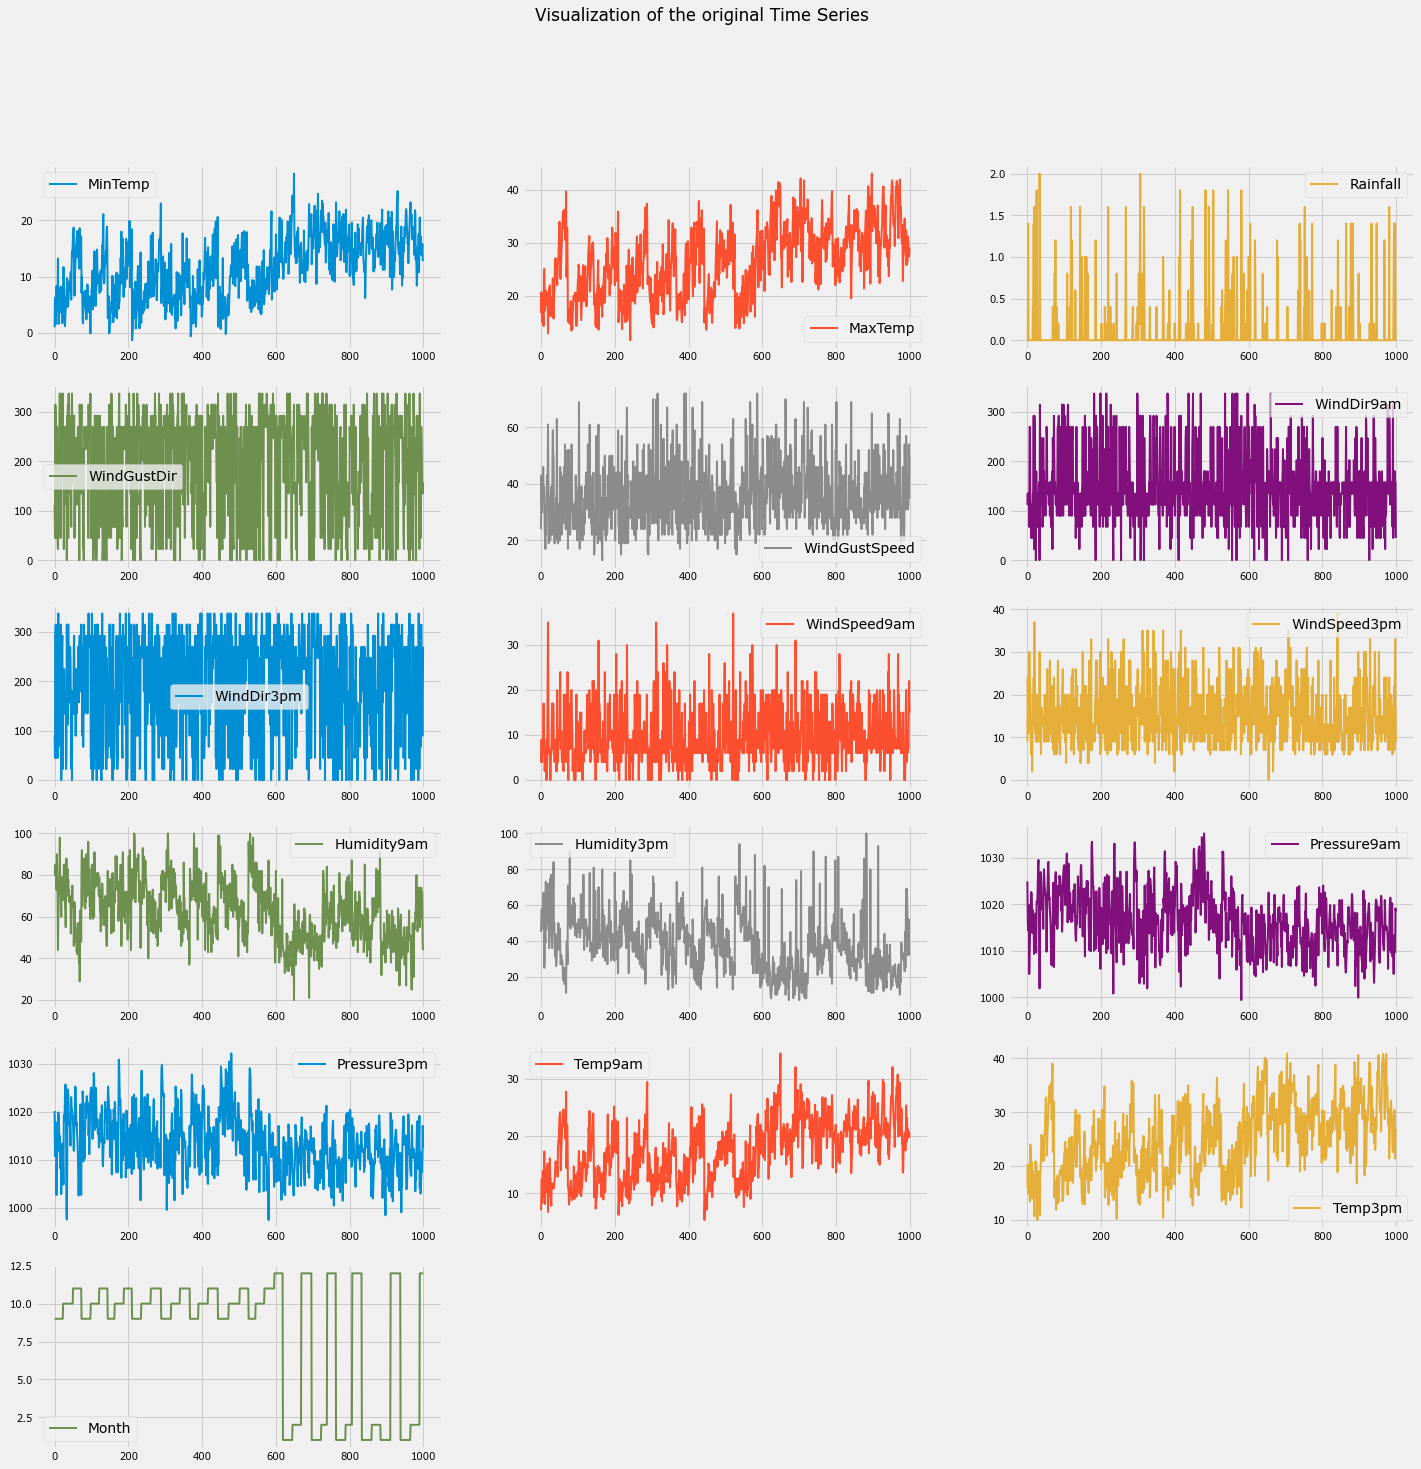

In [60]:
# Plot the time series
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df[:1000].plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

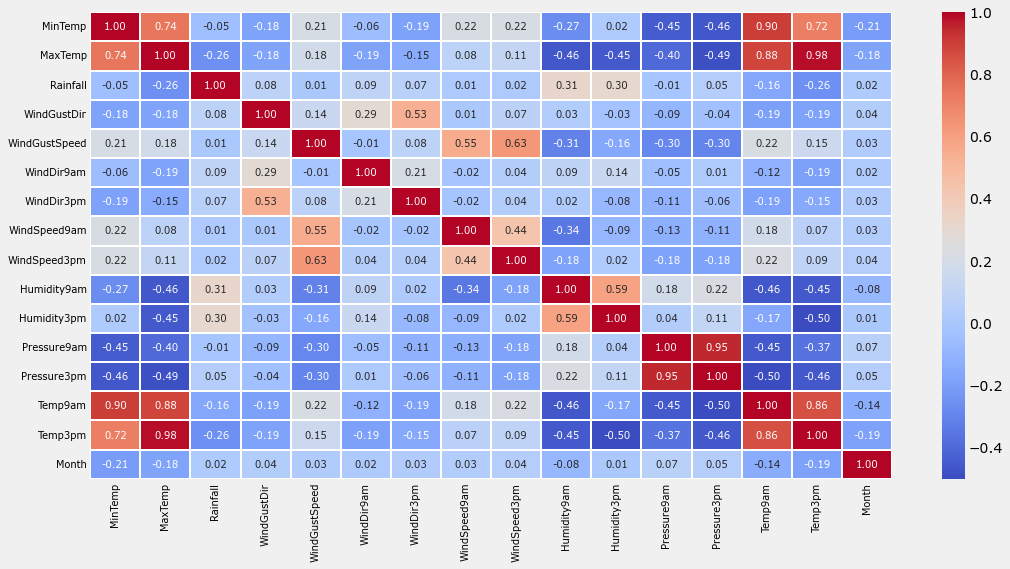

In [61]:
# Let's also draw a heatmap visualization of the correlation matrix

import seaborn as sns
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [62]:
df = df.drop(columns = ['Date','Location','RainTomorrow'],axis=1)

In [63]:
df = df.drop(columns = ['RainToday'],axis=1)

In [64]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month
0,1.0,16.8,0.0,112.5,24.0,112.5,90.0,9.0,9.0,82.0,45.0,1024.9,1020.2,7.0,16.0,9
1,6.1,20.7,0.0,45.0,43.0,135.0,45.0,4.0,24.0,80.0,54.0,1016.6,1010.8,10.2,20.3,9
2,6.3,16.9,1.4,315.0,35.0,112.5,292.5,6.0,13.0,85.0,58.0,1014.4,1012.3,12.5,15.5,9
3,2.1,15.0,0.0,292.5,30.0,112.5,315.0,4.0,11.0,81.0,54.0,1019.5,1017.9,8.6,14.9,9
4,1.6,16.6,0.0,45.0,37.0,135.0,45.0,9.0,20.0,79.0,47.0,1018.4,1011.4,8.3,15.4,9


In [65]:
from sklearn.preprocessing import LabelEncoder

cat_f = [x for x in df.columns if df[x].dtype == 'object']
print(cat_f)

# traversing all columns for converting into continuous valriables
for name in cat_f:
    enc = LabelEncoder()
    enc.fit(list(df[name].values.astype('str')) + list(df[name].values.astype('str')))
    df[name] = enc.transform(df[name].values.astype('str'))

[]


In [66]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [67]:
# Split train and test data
train_features = train.loc[:,df.columns != 'Rainfall']
train_labels = train.loc[:, 'Rainfall']

test_features = test.loc[:,df.columns != 'Rainfall']
test_labels = test.loc[:, 'Rainfall']
# I want to use a T-days window of input data for predicting target_class
# It means I need to prepend (T-1) last train records to the 1st test window
T = 15  # my choice of the timesteps window

prepend_features = train_features.iloc[-(T-1):]
#print(prepend_features)
test_features = pd.concat([prepend_features, test_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((87618, 15), (87618,), (21919, 15), (21905,))

In [21]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

scaled_train_features.shape, scaled_test_features.shape

((70001, 16), (39537, 16))

In [22]:
'''
# Plot the rescaled_train_features
plt.style.use('fivethirtyeight')
scaled_train_features[:1000].plot(subplots=True,
                           layout=(6, 3),
                           figsize=(24,24),
                           fontsize=10, 
                           linewidth=2, 
                           title='Visualization of the scaled Train Features')
plt.show()
'''

SyntaxError: EOL while scanning string literal (Temp/ipykernel_8572/435803644.py, line 11)

In [69]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
#print(test_labels.shape)
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (87604, 15, 15), (87604, 1)
Test data dimensions: (21905, 15, 15), (21905, 1)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

In [42]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [128, 64, 32, 16, 1]                # number of units in hidden and output layers

M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]

N = X_train.shape[2]                 # number of features

BATCH = 128                      # batch size
EPOCH = 25                           # number of epochs

LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion

DP = 0.2                             # dropout rate
RDP = 0.1                            # recurrent dropout rate

print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')


# Recurrent Activation - for input/forget/output state
# Activation - for hidden state and hidden output state

# Build the Model
model = Sequential()

model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))

model.add(BatchNormalization())


model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))

model.add(BatchNormalization())

model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))

model.add(BatchNormalization())

model.add(LSTM(units=LAYERS[3],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))

model.add(BatchNormalization())

model.add(Dense(units=LAYERS[4], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='mse',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())


# patience = upto how much epochs it must wait before redcuing LR by factor 0.5 if there is no change in loss.

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=1, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)


# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.2,
                    shuffle=True,verbose=1,
                    callbacks=[lr_decay, early_stop])

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)


# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)

print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')


layers=[128, 64, 32, 16, 1], train_examples=87604, test_examples=21905
batch = 128, timesteps = 15, features = 15, epochs = 25
lr = 0.05, lambda = 0.03, dropout = 0.2, recurr_dropout = 0.1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 15, 128)           73728     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 128)           512       
_________________________________________________________________
lstm_5 (LSTM)                (None, 15, 64)            49408     
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 64)            256       
_________________________________________________________________
lstm_6 (LSTM)                (None, 15, 32)            12416     
_______________________________________________________________

Epoch 24/25
548/548 [==============================] - ETA: 0s - loss: 0.1527 - accuracy: 0.7803
Epoch 00024: ReduceLROnPlateau reducing learning rate to 2.3841858265427618e-08.
548/548 [==============================] - 70s 127ms/step - loss: 0.1527 - accuracy: 0.7803 - val_loss: 0.1564 - val_accuracy: 0.7785
Epoch 25/25
548/548 [==============================] - ETA: 0s - loss: 0.1527 - accuracy: 0.7803
Epoch 00025: ReduceLROnPlateau reducing learning rate to 1.1920929132713809e-08.
548/548 [==============================] - 70s 127ms/step - loss: 0.1527 - accuracy: 0.7803 - val_loss: 0.1564 - val_accuracy: 0.7785
-----------------------------------------------------------------
Training was completed in 1760.93 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 77.9919%
test accuracy = 78.3246%
test error = 4748 out of 21905 examples


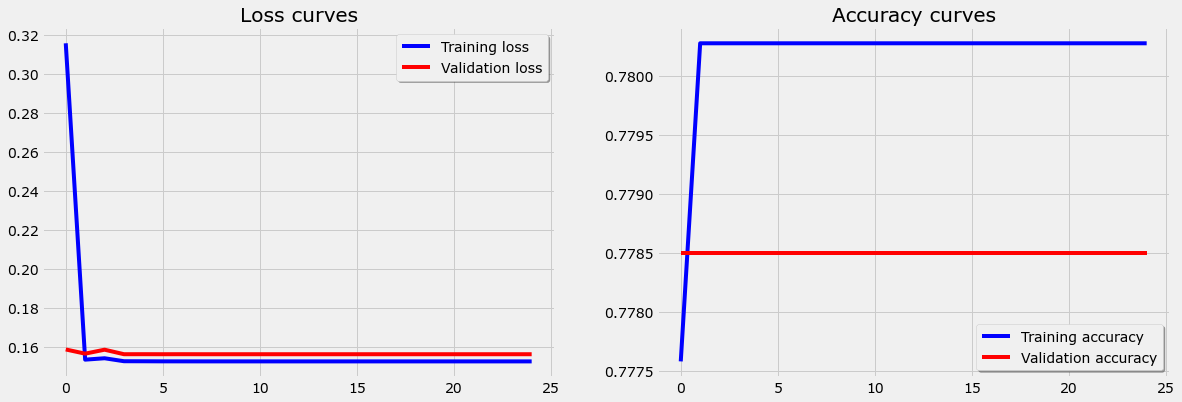

In [43]:
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)

axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [36]:
model.save('Models/LSTM_Regressor_2')

INFO:tensorflow:Assets written to: Models/LSTM_Regressor_2\assets


In [44]:
y_hat = model.predict(X_test, batch_size=M_TEST, verbose=1)

1/1 [==============================] - 0s 2ms/step


In [45]:
y_hat.shape

(21905, 1)

In [46]:
y_test.shape

(21905, 1)

In [47]:
y_test[:150]

array([[0. ],
       [0. ],
       [0. ],
       [1.4],
       [0. ],
       [1.8],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [1.2],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.8],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.4],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.2],
       [0. ],
       [0. ],
       [0.4],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
      

In [48]:
y_hat[:150]

array([[0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.15447238],
       [0.154

In [49]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_hat)
rmse_title_lstm = 'Test MSE: %.3f' % rmse
print(rmse_title_lstm)

Test MSE: 0.152


In [50]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_hat)
print("R2 score is : ", score)

R2 score is :  -1.2553461137487787e-05


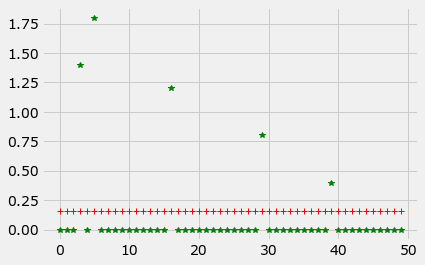

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_test[:50],'g*',y_hat[:50],'r+')
plt.show()

In [52]:
import tensorflow as tf
classifier = tf.keras.models.load_model('Models/LSTM_Regressor_2')

In [53]:
#train=df.sample(frac=0.8,random_state=200)
#test=df.drop(train.index)


df = pd.read_csv("Datasets/cleaned_weatherAUS.csv")
Direction = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
Degree = []

x = 0
for i in range(0,337,22):
    Degree.append(i+x)
    x = x + 0.5
    
Direction_Degree = dict(zip(Direction,Degree))
print(Direction_Degree)

#Converting WindGustDir, WindDir9am, WindDir3pm to degree format

df = df.replace({"WindGustDir": Direction_Degree})
df = df.replace({"WindDir9am": Direction_Degree})
df = df.replace({"WindDir3pm": Direction_Degree})

df = df.drop(columns = ['Date','Location','RainTomorrow'],axis=1)
df = df.drop(columns = ['RainToday'],axis=1)


from sklearn.preprocessing import LabelEncoder

cat_f = [x for x in df.columns if df[x].dtype == 'object']
print(cat_f)

# traversing all columns for converting into continuous valriables
for name in cat_f:
    enc = LabelEncoder()
    enc.fit(list(df[name].values.astype('str')) + list(df[name].values.astype('str')))
    df[name] = enc.transform(df[name].values.astype('str'))
    


# Split train and test data
train_features = train.loc[:,df.columns != 'Rainfall']
train_labels = train.loc[:, 'Rainfall']

test_features = test.loc[:,df.columns != 'Rainfall']
test_labels = test.loc[:, 'Rainfall']

T = 15  # my choice of the timesteps window

prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
#print(test_labels.shape)
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

{'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5}
[]
Train data dimensions: (87604, 15, 15), (87604, 1)
Test data dimensions: (21905, 15, 15), (21905, 1)


In [54]:
y_hat = classifier.predict(X_test, verbose=1)

rmse = mean_squared_error(y_test,y_hat)
rmse_title_lstm = 'Test MSE: %.3f' % rmse
print(rmse_title_lstm)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_hat)
print("R2 score is : ", score)

import matplotlib.pyplot as plt
plt.plot(y_test[:100],'g*',y_hat[:100],'r+')
plt.show()

ValueError: in user code:

    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:224 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, None, 16), found shape=[None, 15, 15]
